In [29]:
import pandas as pd
import altair as alt
from sklearn.feature_extraction.text import TfidfVectorizer
alt.renderers.enable('notebook')
alt.data_transformers.enable('default', max_rows=None)
import ast

In [30]:
df = pd.read_csv('humanist_vols_ner_tokens.csv', converters={'cleaned_tokens':ast.literal_eval})

In [4]:
# Let's test out TF-IDF vs Word Counts vs NER

In [5]:
# TFIDF CODE

In [10]:
all_docs = df.cleaned_text.tolist()

# Specify the ngram_range for the Vectorizer
vectorizer = TfidfVectorizer(ngram_range=(1,2), max_df=0.5, min_df=1)
transformed_documents = vectorizer.fit_transform(all_docs)

transformed_documents_as_array = transformed_documents.toarray()

# Output the top tokens for each document
for counter, doc in enumerate(transformed_documents_as_array):
    # construct a dataframe
    tf_idf_tuples = list(zip(vectorizer.get_feature_names(), doc))
    one_doc_as_df = pd.DataFrame.from_records(tf_idf_tuples, columns=['term', 'score']).sort_values(by='score', ascending=False).reset_index(drop=True)
    print(one_doc_as_df[0:20])

                  term     score
0                   ox  0.564914
1     utorepas subject  0.202336
2             utorepas  0.195046
3     mccarty utorepas  0.167252
4         december est  0.115811
5        date december  0.083463
6           lines date  0.071342
7             utoronto  0.070301
8      num contributed  0.058034
9         ir collected  0.052857
10              coombs  0.048136
11        november est  0.047922
12             john ox  0.043744
13  descriptive markup  0.042083
14            biografy  0.037722
15      rahtz computer  0.034631
16        james coombs  0.034610
17           junk mail  0.034539
18               flame  0.033604
19        paralanguage  0.032808
                term     score
0              na na  0.241834
1            apr edt  0.198419
2               pali  0.103894
3         wesolowski  0.088910
4            voorhis  0.085353
5             oikawa  0.085353
6            texpert  0.078300
7           makrolog  0.076435
8              melby  0.0657

                  term     score
0                amico  0.321334
1             cch http  0.292265
2                ninch  0.282364
3      http humanities  0.247853
4                amish  0.131272
5       ninch announce  0.120707
6        amico library  0.118315
7           http david  0.077225
8              hforums  0.074105
9                 anlp  0.073515
10        http hforums  0.072555
11    announce subject  0.062718
12      david ninchorg  0.060502
13            ninchorg  0.056446
14  networked cultural  0.055443
15                elra  0.054381
16             questia  0.052192
17             dc http  0.051429
18  ninch announcement  0.050940
19        ninchorg fax  0.050789
                         term     score
0                       ninch  0.443983
1              ninch announce  0.155226
2      subjects announcements  0.116975
3                     hforums  0.103287
4                        arun  0.098569
5                    tripathi  0.093514
6                       osh

In [6]:
# Word Counts

In [33]:
df_exploded = df.explode('cleaned_tokens')
df_grouped = df_exploded.groupby(['dates', 'cleaned_tokens']).size().reset_index(name='frequency')
df_grouped.sort_values(by=['dates', 'frequency' ], inplace=True, ascending=False)
df_top = df_grouped.sort_values(by=['dates','frequency'],ascending = False).groupby('dates').head(10)
df_pivot = df_top.pivot(index='cleaned_tokens', columns='dates', values='frequency').fillna(0)
df_top = df_pivot.unstack().reset_index(name='frequency')

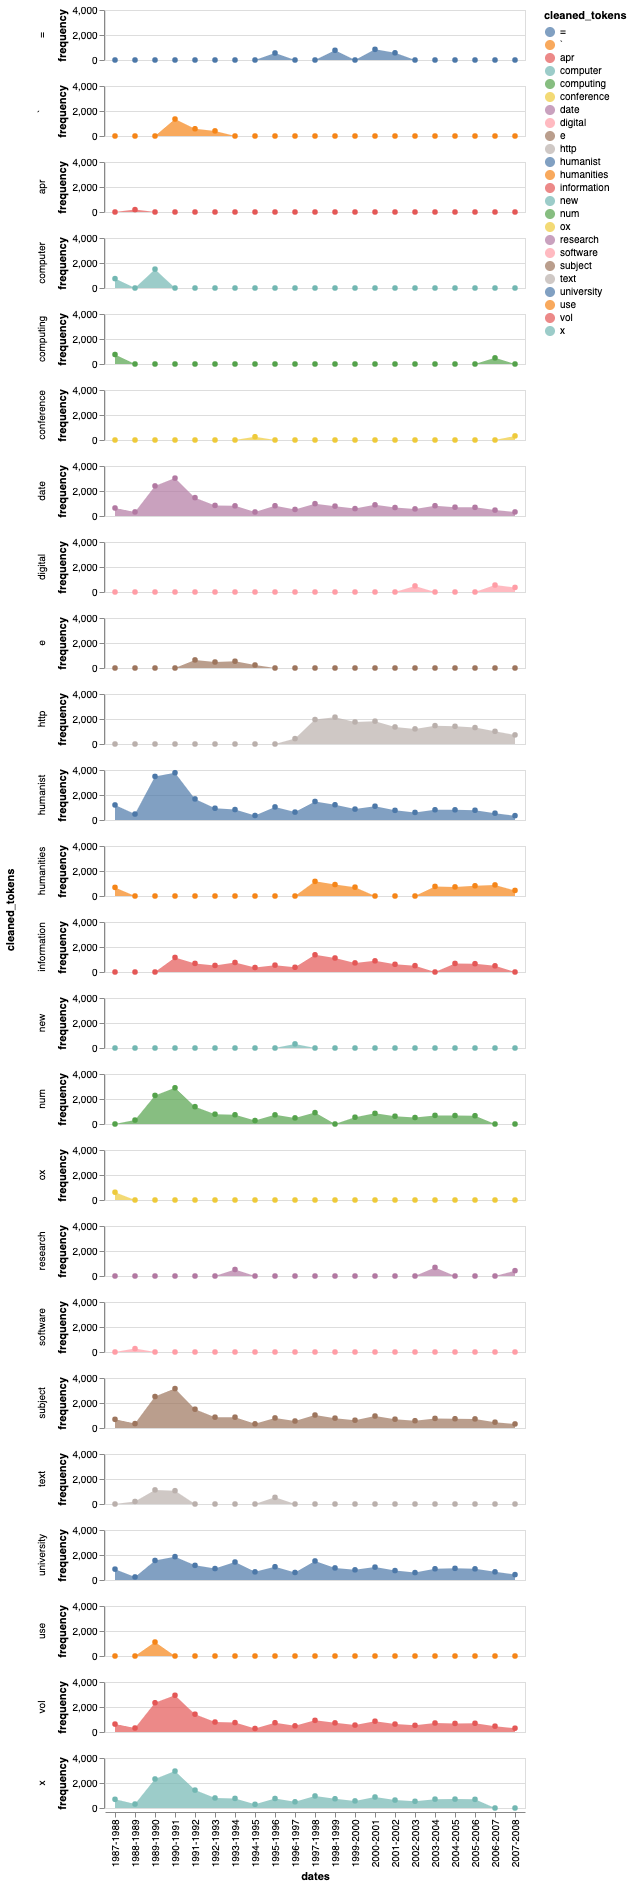

In [34]:
alt.Chart(df_top).mark_area(point=True).encode(
    y='frequency:Q',
    x='dates',
    color='cleaned_tokens:N',
    tooltip=['cleaned_tokens', 'frequency', 'dates'],
    row='cleaned_tokens:N'
).properties(height=50)

In [ ]:
# NER Counts

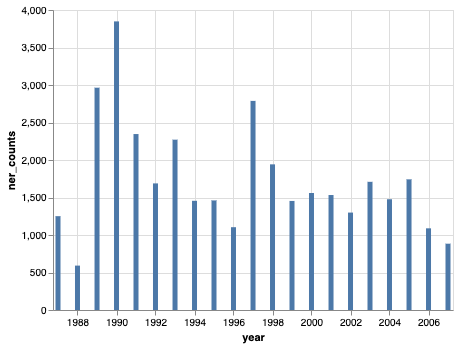

In [37]:
import nltk
# df['ner_tokens']= df.ner.apply(nltk.word_tokenize)
df['ner_counts'] = df.ner_tokens.str.len()
df['year'] = pd.to_datetime(df.dates.str[0:4], format='%Y')
alt.Chart(df[['year', 'ner_counts']]).mark_bar().encode(
    x='year:T',
    y='ner_counts:Q'
)

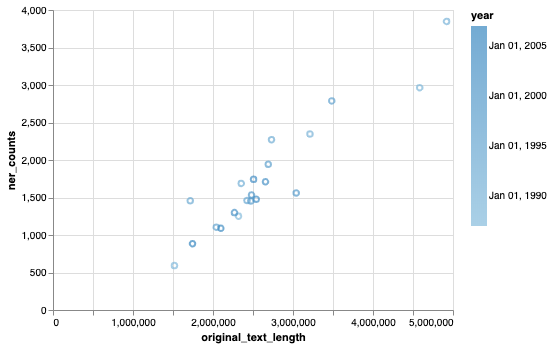

In [38]:
alt.Chart(df[['original_text_length', 'ner_counts', 'year']]).mark_point().encode(
    x='original_text_length:Q',
    y='ner_counts:Q',
    color='year:T'
)

In [ ]:
# nearest = alt.selection(type='single', nearest=True, on='mouseover',
#                         fields=['year'], empty='none')
# line = alt.Chart(df_top).mark_line().encode(
#     y='frequency:Q',
#     x='year:T',
#     color=alt.Color('ner_tokens:N', scale=alt.Scale(scheme='category20b')),
# )
# selectors = alt.Chart(df_top).mark_point().encode(
#     x='year:T',
#     opacity=alt.value(0),
# ).add_selection(
#     nearest
# )
# points = line.mark_point().encode(
#     opacity=alt.condition(nearest, alt.value(1), alt.value(0))
# )
# rules = alt.Chart(df_top).mark_rule(color='gray').encode(
#     x='year:T',
# ).transform_filter(
#     nearest
# )
# text = line.mark_text(align='left', dx=5, dy=-5).encode(
#     text=alt.condition(nearest, 'frequency:Q', alt.value(' '))
# )

# alt.layer(
#     line, selectors, points, rules, text
# ).properties(
#     width=600, height=500
# )